# Case 1. Heart Disease Classification (Template)
**Neural Networks for Machine Learning Applications**<br>
21.11.2024<br>
**Miska Nurminen**<br>
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

The purpose of this notebook was to learn and understand how neural networks are used in diagnostic decision making.<br>
The task was to read and preprocess the data [Heart Disease Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset) and create and train a dense neural network to predict to classify the presence of heart disease.

## 2. Setup

- Pandas is used to read the csv file containing the dataset.
- Tensorflow and keras are used to make the neural network itself.
- matplotlib is used to visualize loss and accuracy.
- time is used to display total training time
- sklearn is used for preprocessing

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import Sequential
from keras import layers
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 3. Dataset

The dataset contains 253,680 survey responses from cleaned BRFSS 2015 to be used for the binary classification of heart disease.<br>
229,787 respondents do not have/have not had heart disease, while 23,893 have had heart disease.

A sample size of 20000 is used for this.

In [123]:
dataframe = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
dataframe = dataframe.sample(20000)
dataframe

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
72496,1.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,4.0
75782,1.0,1.0,1.0,1.0,33.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,7.0,7.0,1.0,1.0,9.0,4.0,3.0
153752,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,2.0,5.0,0.0,0.0,8.0,6.0,6.0
236100,0.0,1.0,1.0,1.0,39.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,6.0
219821,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65936,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,5.0,7.0
116390,1.0,0.0,0.0,1.0,25.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,30.0,30.0,1.0,0.0,7.0,5.0,5.0
169476,0.0,0.0,1.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,10.0,0.0,0.0,0.0,12.0,3.0,6.0
132613,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,7.0


## 4. Preprocessing

- There are no missing values, however 'HeartDiseaseorAttack' column is dropped from input.
- I used train_test_split from sklearn -library to split the data to train, validation and test sets.
- I used the scaler from sklearn -library to scale the data.

In [124]:
# preparing the necessary datasets for training, validation and testing
input_full = dataframe.drop(columns='HeartDiseaseorAttack')
output_full = dataframe['HeartDiseaseorAttack']

input_train, input_test, output_train, output_test = train_test_split(input_full, output_full, test_size=0.2)
input_train, input_val, output_train, output_val = train_test_split(input_train, output_train, test_size=0.2)

scaler = StandardScaler()
scaler.fit(input_train)
input_train = scaler.transform(input_train)
input_val = scaler.transform(input_val)
input_test = scaler.transform(input_test)
output_train = output_train.values
output_val = output_val.values

## 5. Modeling

- binary_crossentropy is used for loss, adam is used for optimizer. Metrics are accuracy, precision and recall.
- I used 2 hidden layers, 128 nodes and 64 nodes, both with relu actiovation. Dropout of 0.5 is used in the end. output layer with sigmoid activation is used.

In [125]:

model = Sequential([
    layers.Input(shape=(21,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

## 6. Training

Trains a binary classification model using the Adam optimizer with a binary crossentropy loss function. The training uses three metrics: accuracy, precision, and recall.<br>
Class weights are applied to address class imbalance.<br>
The training runs for 50 epochs with a batch size of 64 and evaluates the model on validation data during training.<br>
The total training time is recorded and displayed.

In [126]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

class_weight = {0: 0.55, 1: 5.4}

start_time = time.time()

training = model.fit(input_train, output_train, epochs=50, batch_size=64, validation_data=(input_val, output_val), class_weight=class_weight, verbose=0)

end_time = time.time()
total_training_time = end_time - start_time

print(f"Total training time: {total_training_time} seconds")

Total training time: 12.924458503723145 seconds


In [127]:
training.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

## 7. Performance and evaluation

- Both plots are looking good. There doesn't seem to bee underfitting, but overfitting seems to happen in loss plot.
- Final performance is good, although accuracy could be better. Accuracy is .8413 and loss is .2998.

Text(0, 0.5, 'Loss')

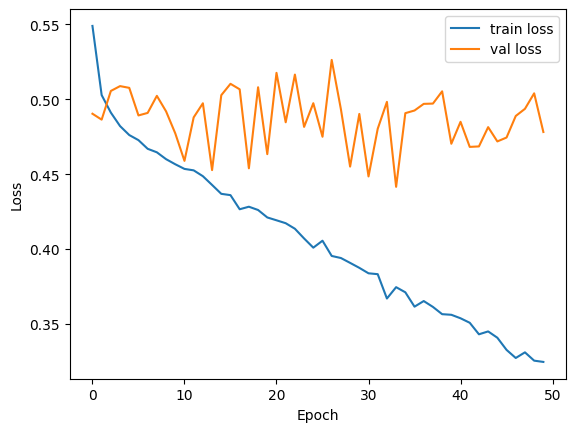

In [128]:
# visualize the training and validation loss
plt.plot(training.history['loss'], label='train loss')
plt.plot(training.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

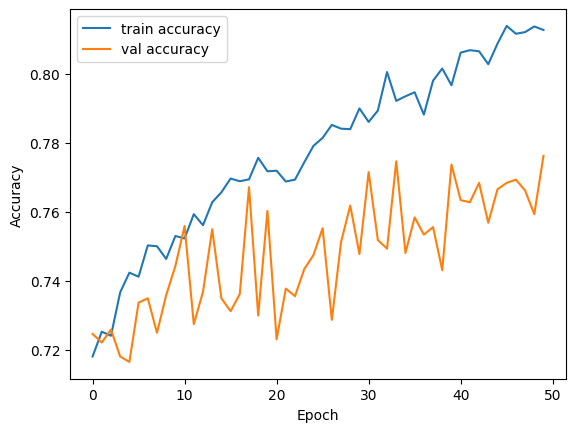

In [129]:
# visualize the training and validation accuracy
plt.plot(training.history['accuracy'], label='train accuracy')
plt.plot(training.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [130]:
# test the model with current test set
loss, precision, recall, accuracy = model.evaluate(input_train, output_train)

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.8413 - loss: 0.2998 - precision: 0.3602 - recall: 0.9405


## 8. Discussion and conclusions

- I used the same model architecture except, I tried different optimizers. I tested rmsprop, nadam, adadelta and finally adam, which produced the best results.
    - rmsprop: accuracy 0.779, loss 0.366
    - nadam: accuracy 0.823, loss 0.326
    - adadelta: accuracy 0.505, loss 0.734
- Best model was sequental with 2 hidden layers, 128 and 64 and a dropout of 0.5. Optimizer was adam and loss function was binary crossentropy.
- Final achieved performance was an accuracy of .841 and loss of .299.
- I learned how to preprocess text data.
- Accuracy could be higher, same with loss. A better kind of model could also be beneficial.